# Explore here

# Análisis exploratorio de datos de Airbnb en Nueva York.

## Paso 1
### Importamos el conjunto de datos

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




data_airbnb = pd.read_csv(r"https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
print(data_airbnb.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

## Paso 2.
### Exploración y limpieza de datos.

In [2]:
data_airbnb.shape

(48895, 16)

En el archivo nos encontramos con 48895 filas con 16 columnas.

In [ ]:
data_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

- Existen 48895 filas y 16 columnas.
- El objetivo clase a predecir lo tenemos entre las columnas y sería "price".
- Las variables "reviews_per_month " y "last_review" cuentan con 38843 valores no nulos, por lo que faltan en torno a 10000 resultados. Mientras que en las variables "host_name" y "name" apenas faltan unos 20 valores.
- El resto de variables están completas.
- Los datos tienen 10 características numéricas y 6 características categóricas.

### Eliminar duplicados.

In [ ]:
data_airbnb.drop("id", axis = 1).duplicated().sum()

np.int64(0)

### Eliminamos información irrelevante


In [ ]:
data_airbnb.drop(["id", "name", "latitude", "longitude", "host_name", "host_id", "last_review", "reviews_per_month"], axis = 1, inplace = True)
data_airbnb.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


En este caso, para el análisis de la característica "price" decidimos eliminar las columnas: "id", "name", "latitude", "longitude", "host_name". Porque las consideramos irrelevantes para esta característica.

Las variables "reviews_per_month " y "last_review", se ven reflejadas en "number_of_reviews" por lo que las eliminamos también.


## Paso 3
### Análisis de variables univariantes
#### Análisis sobre variables categóricas

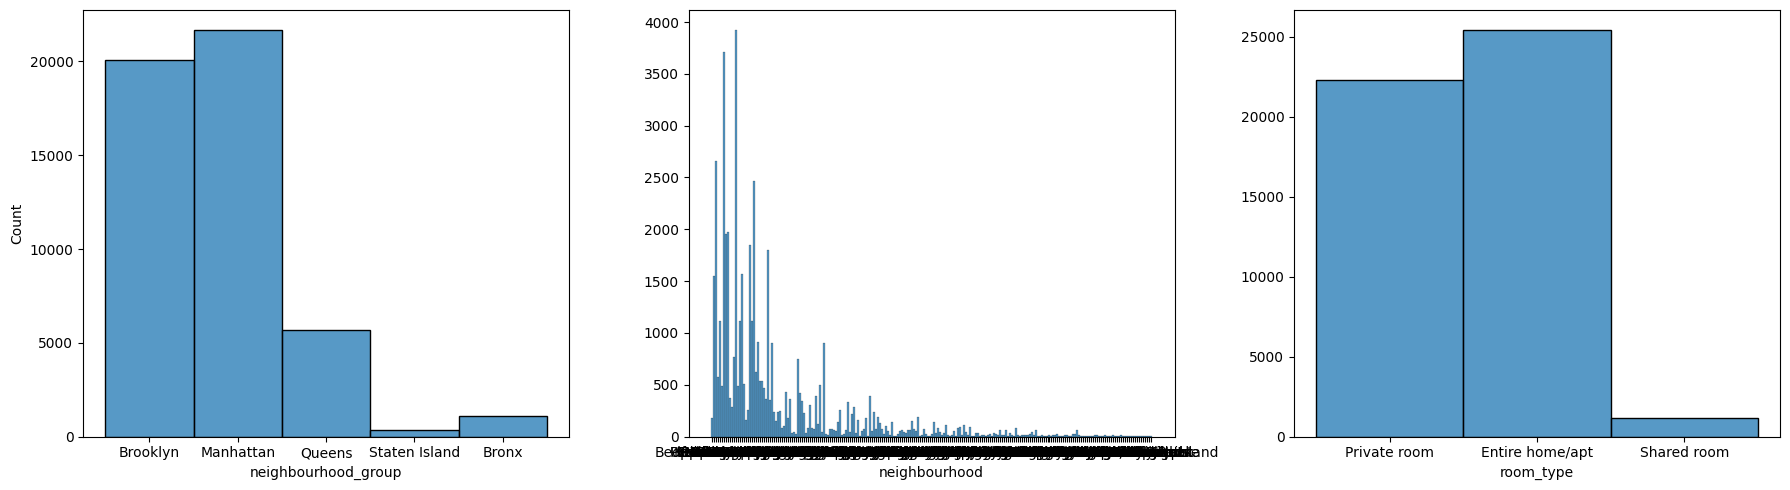

In [6]:
fig, axis = plt.subplots(1, 3, figsize = (18,5))

# Creamos un histograma múltiple de variables categóricas.
sns.histplot(ax = axis[0], data = data_airbnb, x = "neighbourhood_group").set()
sns.histplot(ax = axis[1], data = data_airbnb, x = "neighbourhood").set(ylabel = None)
sns.histplot(ax = axis[2], data = data_airbnb, x = "room_type").set(ylabel = None)

# Ajustamos el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


- En la primera gráfica de "neighbourhood_group" se aprecia la clara tendencia por los barrios de Brooklyn y Manhattan, mientras que muy por debajo aparecerían Queens, Bronx y Staten Island en orden descendente.
- La segunda gráfica no obtenemos valores de interés por la cantidad de barrios diferentes que aparecen, imposible de mostrar en una gráfica.
- Finalmente la tercerta gráfica "room_type", las opciones de apartamento y habitación privada copan casi la totalidad de alquileres frente a algunos datos de habitación compartida.

#### Análisis sobre variables numéricas.

<Axes: xlabel='availability_365'>

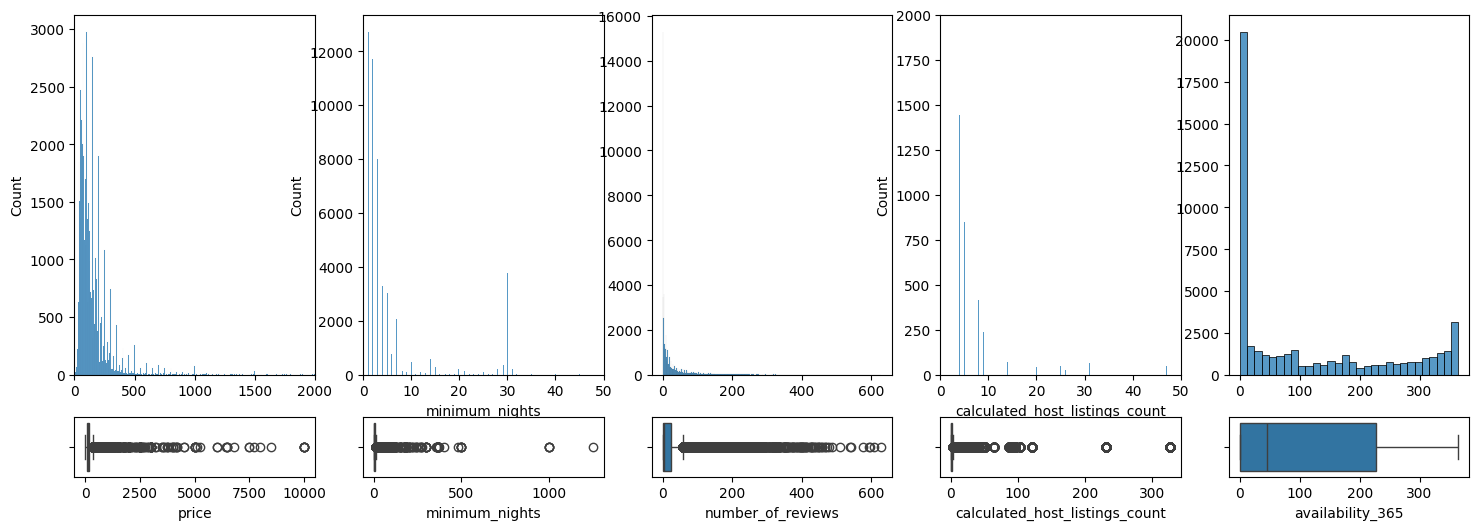

In [7]:
fig, axis = plt.subplots(2, 5, figsize = (18, 6), gridspec_kw = {"height_ratios": [6, 1]})

# Crea una figura de múltiples histogramas y diagramas de caja
sns.histplot(ax = axis[0,0], data = data_airbnb, x = "price").set(xlabel = None,xlim = (0, 2000))
sns.boxplot(ax = axis[1,0], data = data_airbnb, x = "price")
sns.histplot(ax = axis[0,1], data = data_airbnb, x = "minimum_nights").set_xlim(0, 50)
sns.boxplot(ax = axis[1,1], data = data_airbnb, x = "minimum_nights")
sns.histplot(ax = axis[0,2], data = data_airbnb, x = "number_of_reviews").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1,2], data = data_airbnb, x = "number_of_reviews")
sns.histplot(ax = axis[0,3], data = data_airbnb, x = "calculated_host_listings_count").set(xlim = (0, 50), ylim = (0, 2000))
sns.boxplot(ax = axis[1,3], data = data_airbnb, x = "calculated_host_listings_count")
sns.histplot(ax = axis[0,4], data = data_airbnb, x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1,4], data = data_airbnb, x = "availability_365")



- En la variable "price" vemos que la mayoría de resultados se aglutinan en torno a los valores de 0 a 400.
- En "minimum_nights" tenemos un pico en 30 y los restantes casi todos se encuentran entre 0 y 10.
- "Number_of_reviews" junta casi todos los valores en los primeros 100 dígitos.
- Los resultados de "availability_365" se reparten por toda la gráfica. Salvo la primera parte que abarca una enorme mayoría.

## Paso 4
### Análisis de variables multivariantes
#### Análisis numérico-numérico

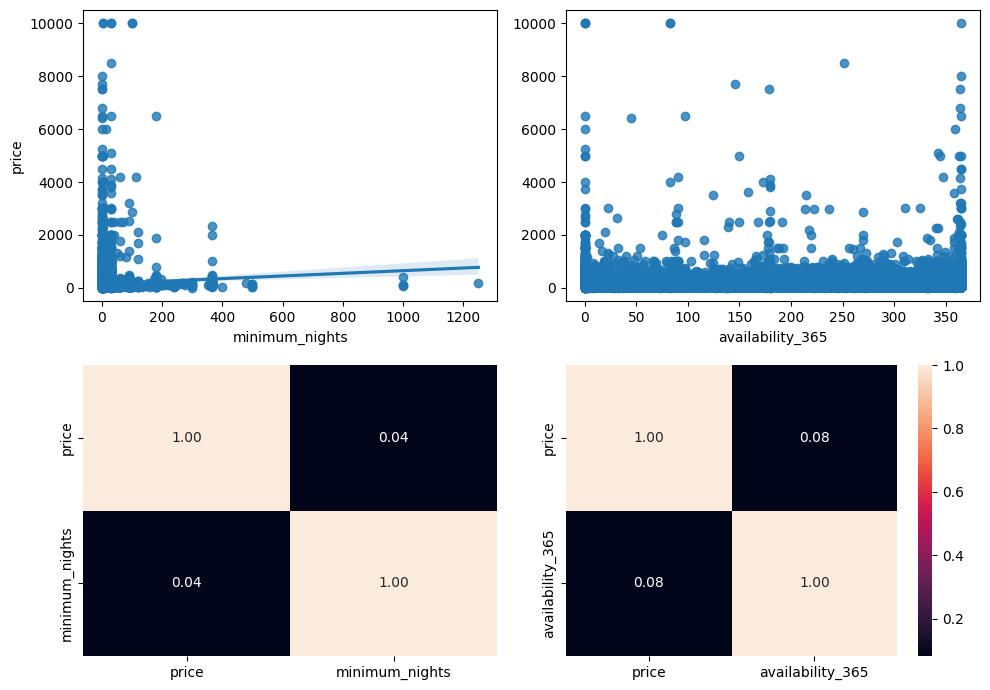

In [8]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data_airbnb, x = "minimum_nights", y = "price")
sns.heatmap(data_airbnb[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data_airbnb, x = "availability_365", y = "price").set(ylabel=None)
sns.heatmap(data_airbnb[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Como se observa en las gráficas (valores muy por debajo de 1, que sería lo máximo), no existe relación lineal entre la variable objetivo "price" y las variables "minimum_nights" y "availability_365".

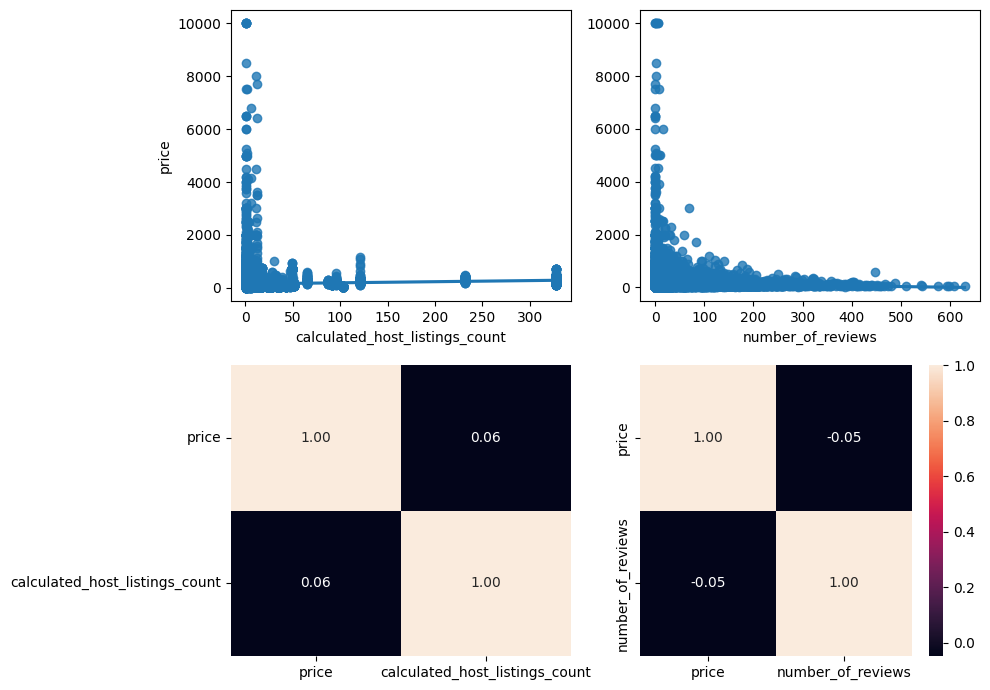

In [9]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data_airbnb, x = "calculated_host_listings_count", y = "price")
sns.heatmap(data_airbnb[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data_airbnb, x = "number_of_reviews", y = "price").set(ylabel=None)
sns.heatmap(data_airbnb[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

- Como se observa en las gráficas (valores muy por debajo de 1, que sería lo máximo), no existe relación lineal entre la variable objetivo "price" y las variables "calculated_host_listings_count" y "number_of_reviews".
- Además en la gráfica donde comparamos "number_of_reviews" nos encontramos con una relación inversa (de ahí los valores negativos), es decir muestra una  ligera tendencia: a mayor "price" menor "number_of_reviews".

#### Análisis categórico-categórico

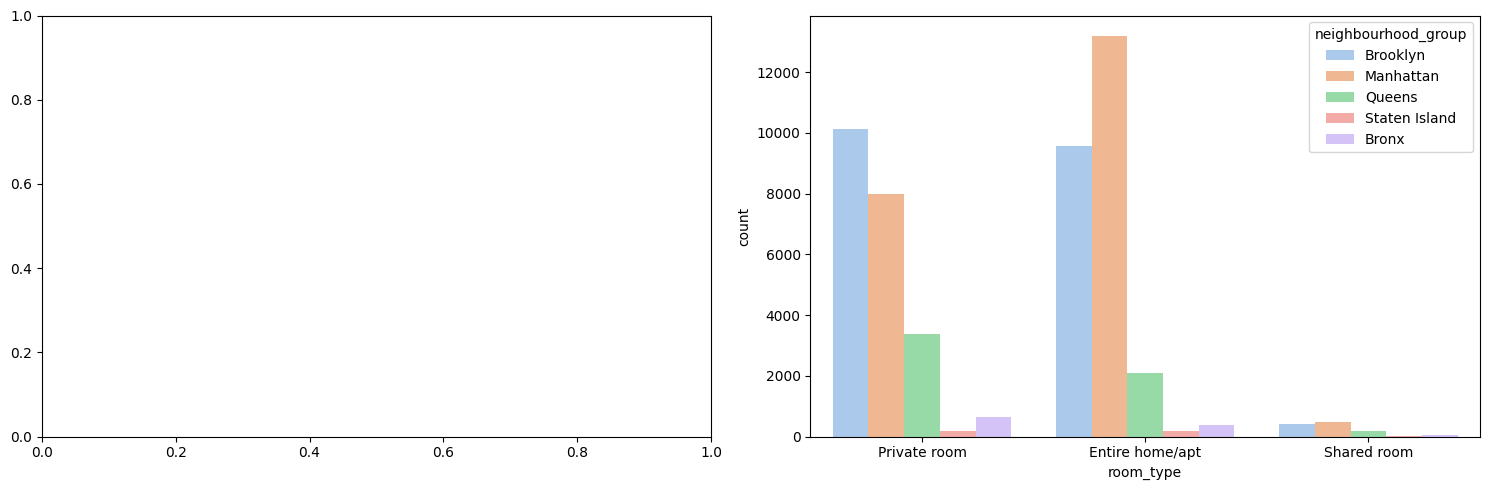

In [27]:
fig, axis = plt.subplots(1, 2,figsize = (15, 5))

sns.countplot(ax = axis[1], data = data_airbnb, x = "room_type", hue = "neighbourhood_group", palette = "pastel")

plt.tight_layout()

plt.show()

- La variable objetivo "price" no es categórica, ni una numérica que pueda transformar a categórica. 
- Las únicas variables categóricas que pueden guardar una relación son las usadas en la gráfica.

#### Combinaciones del precio con varias predictoras, en este caso "neighbourhood_group" y "availability_365".

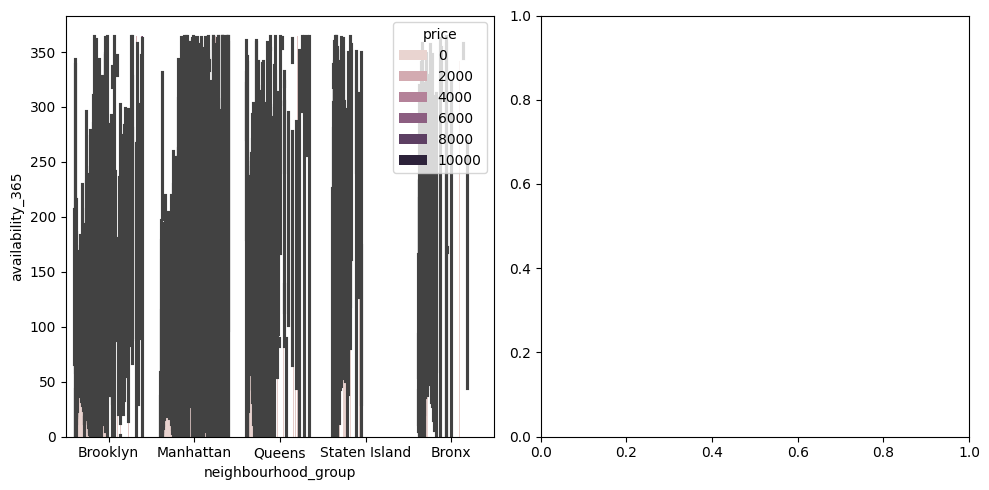

In [11]:
# Crear una figura con dos subgráficos
fig, axis = plt.subplots(figsize = (10,5), ncols = 2)

# Graficar el primer barplot en el primer subgráfico
sns.barplot(ax = axis[0], data = data_airbnb, x = "neighbourhood_group", y = "availability_365", hue = "price")

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


 Esta gráfica la mantengo solo a modo de ejemplo.

#### Análisis de correlaciones

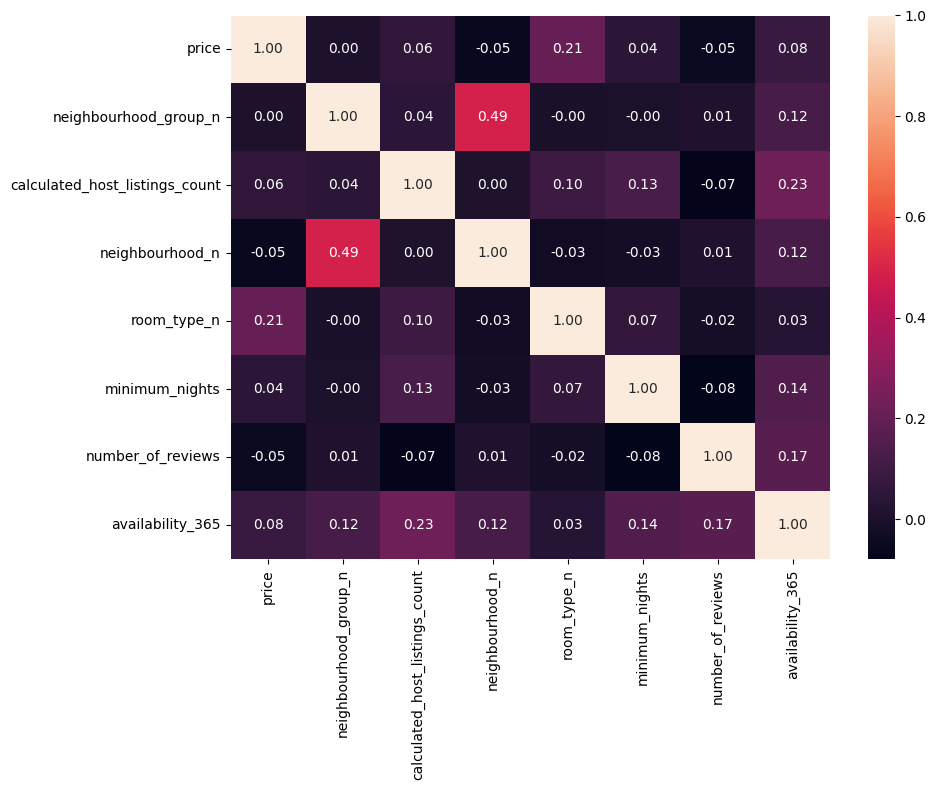

In [12]:
data_airbnb["neighbourhood_group_n"] = pd.factorize(data_airbnb["neighbourhood_group"])[0]
data_airbnb["room_type_n"] = pd.factorize(data_airbnb["room_type"])[0]
data_airbnb["neighbourhood_n"] = pd.factorize(data_airbnb["neighbourhood"])[0]

"""# Convertir columnas categóricas en variables dummy
data_airbnb = pd.get_dummies(data_airbnb, columns=["neighbourhood", "room_type"])"""

fig, axis = plt.subplots(figsize = (10, 8))

sns.heatmap(data_airbnb[["price", "neighbourhood_group_n", "calculated_host_listings_count", "neighbourhood_n", "room_type_n", "minimum_nights", "number_of_reviews", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

#### Análisis numérico-categórico

In [13]:
data_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   neighbourhood_group             48895 non-null  object
 1   neighbourhood                   48895 non-null  object
 2   room_type                       48895 non-null  object
 3   price                           48895 non-null  int64 
 4   minimum_nights                  48895 non-null  int64 
 5   number_of_reviews               48895 non-null  int64 
 6   calculated_host_listings_count  48895 non-null  int64 
 7   availability_365                48895 non-null  int64 
 8   neighbourhood_group_n           48895 non-null  int64 
 9   room_type_n                     48895 non-null  int64 
 10  neighbourhood_n                 48895 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.1+ MB


ValueError: could not convert string to float: 'Brooklyn'

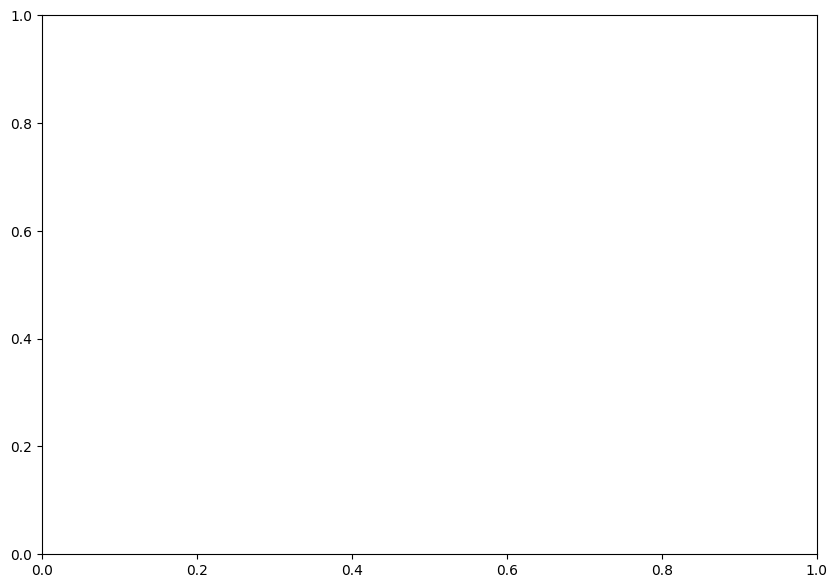

In [14]:
fig, axis = plt.subplots(figsize = (10, 7))
sns. heatmap(data_airbnb[["neighbourhood_group", "neighbourhood", "room_type","price","minimum_nights","number_of_reviews","calculated_host_listings_count","availability_365",]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()


#### Representación de un gráfico de pares que muestra la relación entre varias variables en un conjunto de datos. Mostrando todas las combinaciones posibles de variables numéricas.

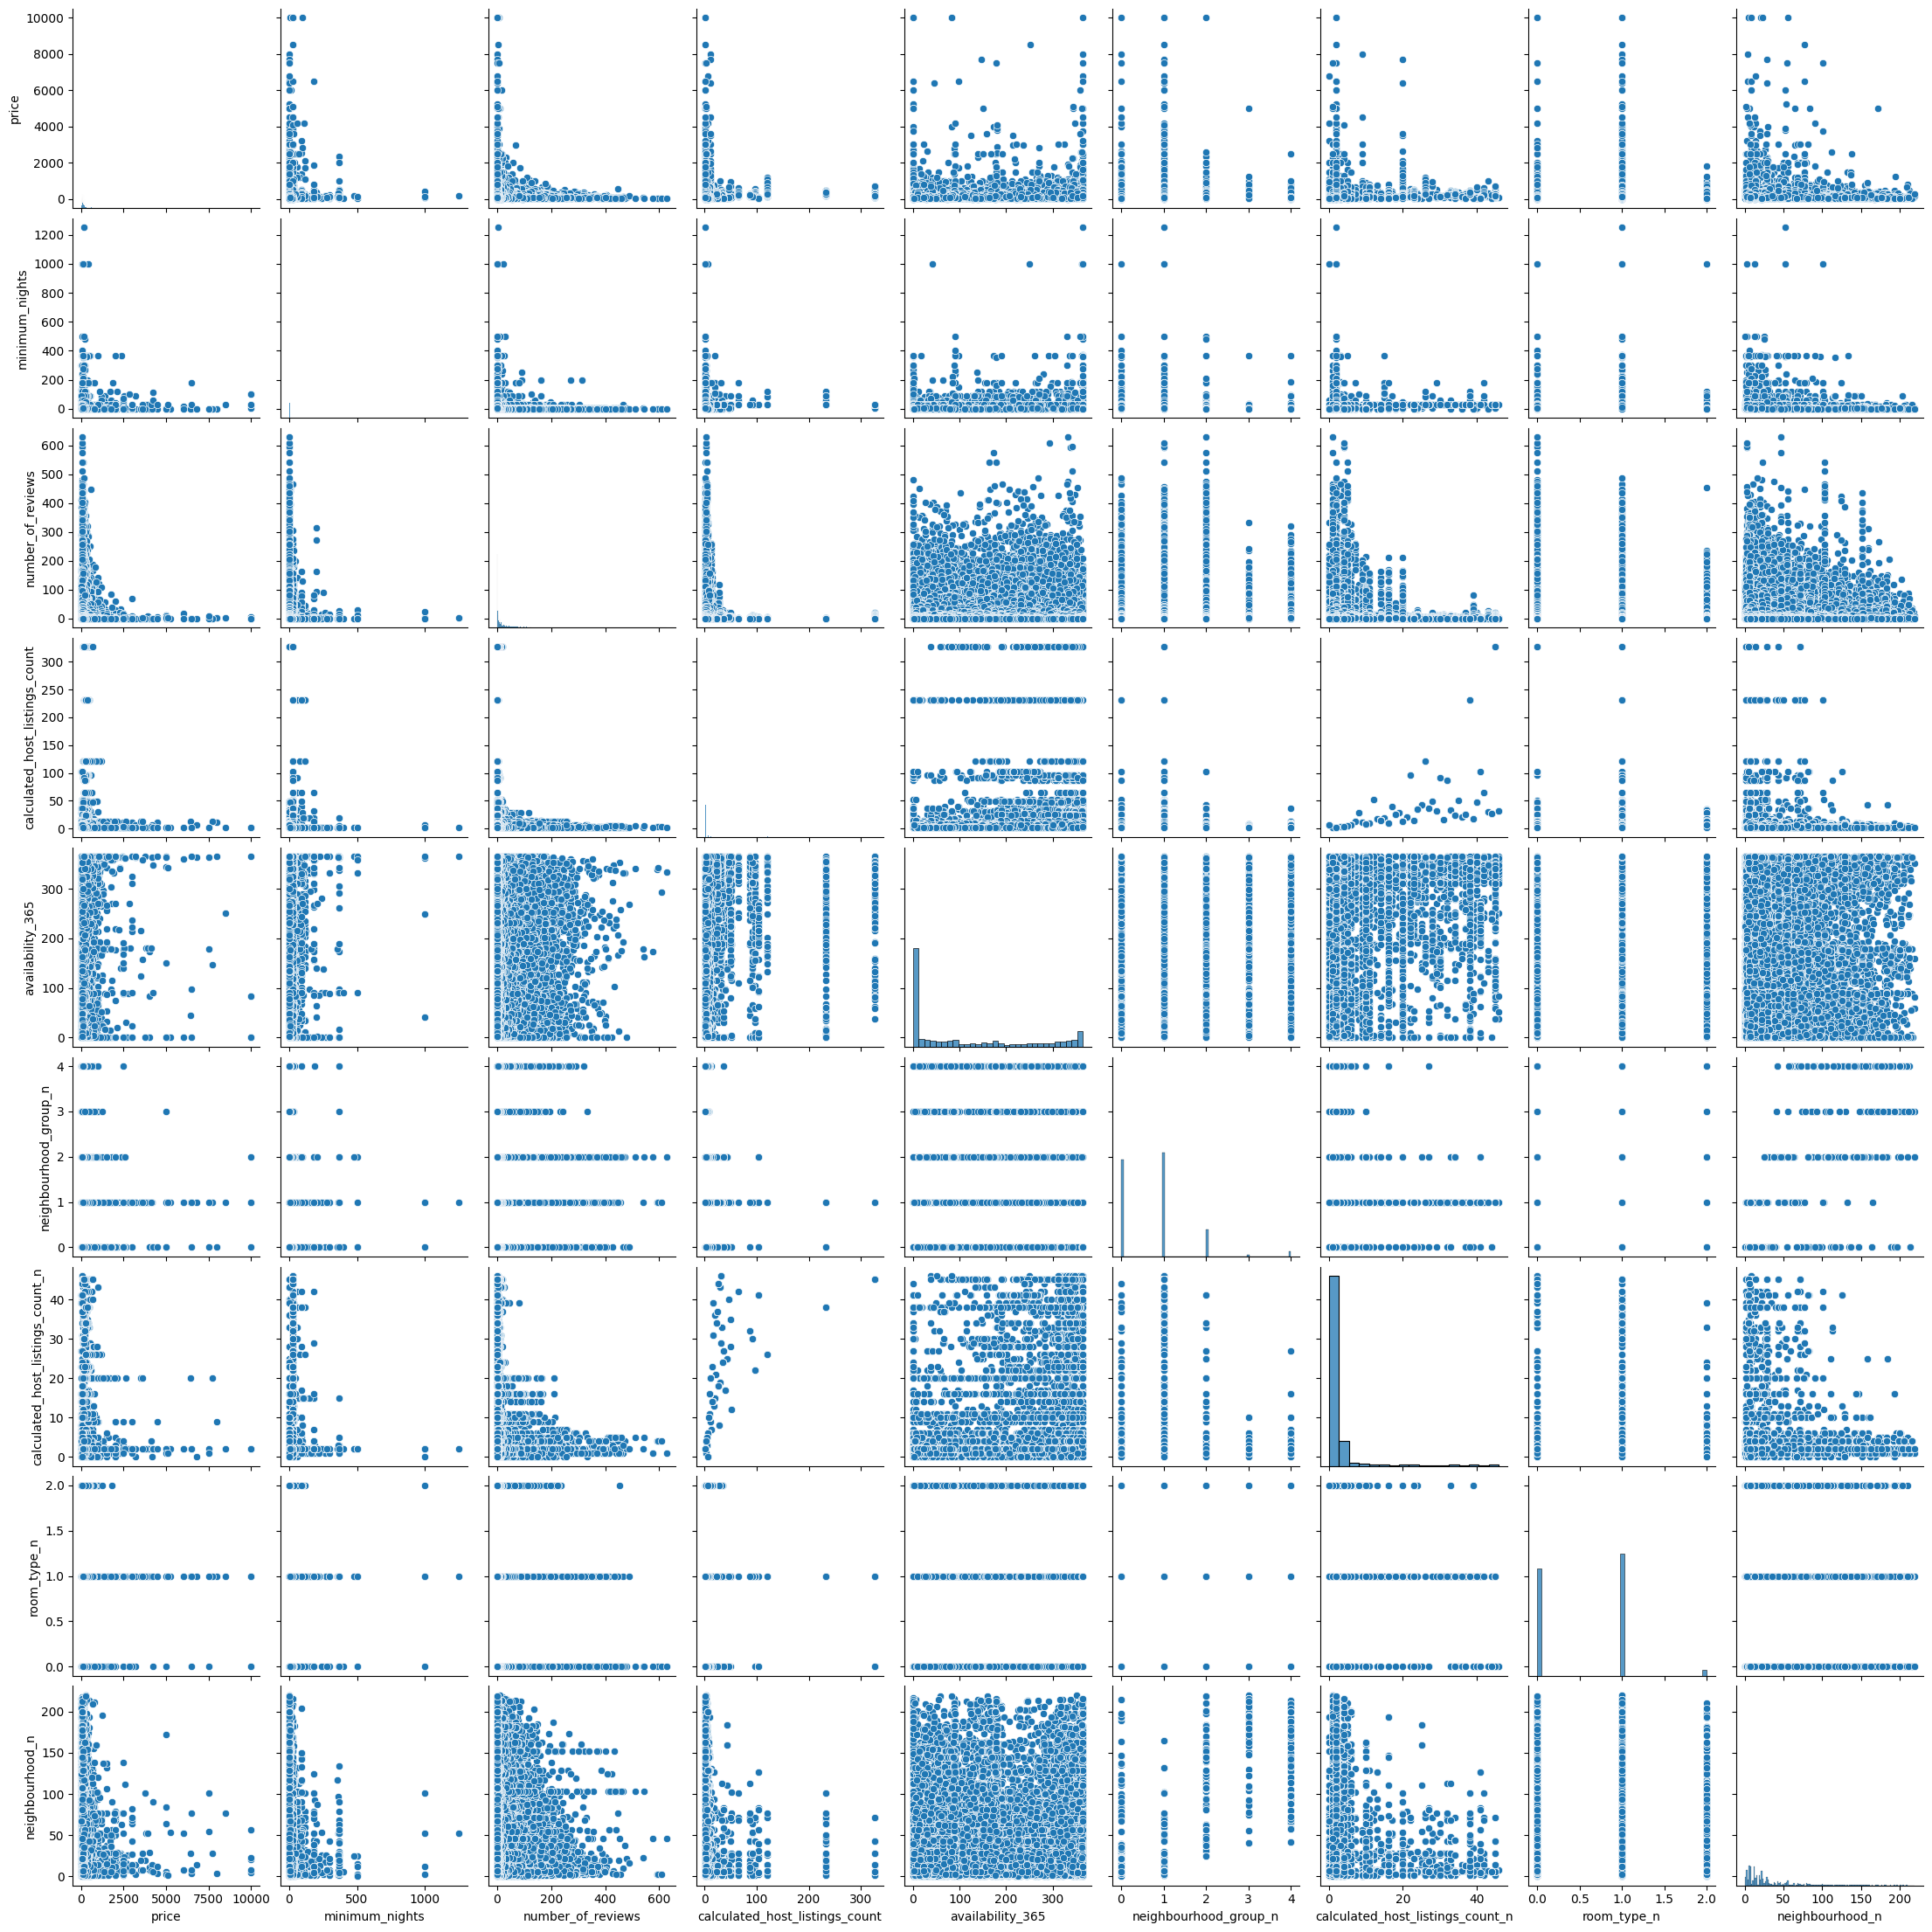

In [29]:
sns.pairplot(data = data_airbnb)

## Paso 5
### Ingeniería de características
#### Análisis de outlaiers

In [14]:
# Análisis descriptivo básico con la función describe()
data_airbnb.describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,calculated_host_listings_count_n
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,7.143982,112.781327,0.786911,3.843379
std,240.154170,20.510550,44.550582,32.952519,131.622289,0.844386,7.054189
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,69.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000
50%,106.000000,3.000000,5.000000,1.000000,45.000000,1.000000,2.000000
75%,175.000000,5.000000,24.000000,2.000000,227.000000,1.000000,2.000000
max,10000.000000,1250.000000,629.000000,327.000000,365.000000,4.000000,46.000000


- El valor máximo de la variable "price" parece desviarse mucho con respecto a la media de la variable.
- 

ValueError: Could not interpret value `` for `y`. An entry with this name does not appear in `data`.

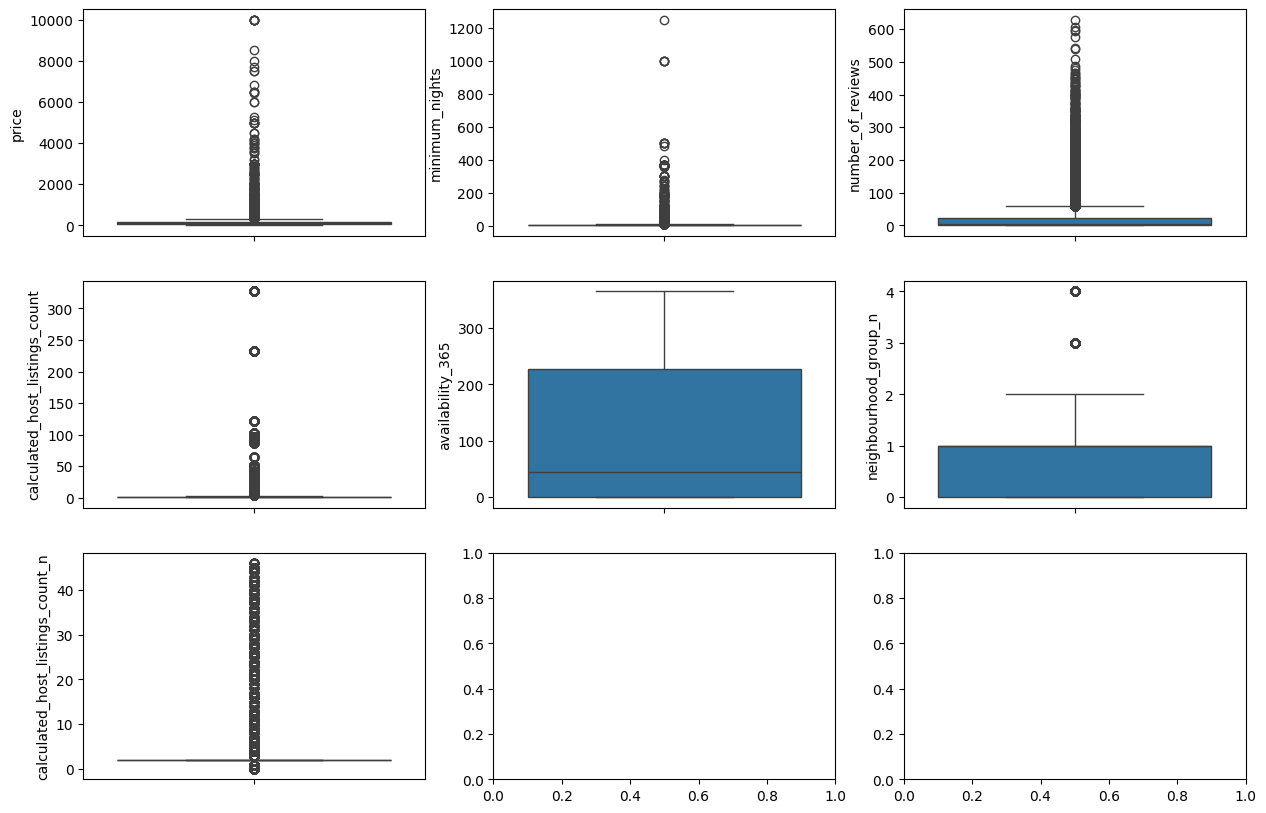

In [16]:
# Representamos diagramas de cajas para ver de forma más clara los valores atípicos.

fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = data_airbnb, y = "price")
sns.boxplot(ax = axis[0, 1], data = data_airbnb, y = "minimum_nights")
sns.boxplot(ax = axis[0, 2], data = data_airbnb, y = "number_of_reviews")
sns.boxplot(ax = axis[1, 0], data = data_airbnb, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[1, 1], data = data_airbnb, y = "availability_365")
sns.boxplot(ax = axis[1, 2], data = data_airbnb, y = "neighbourhood_group_n")
sns.boxplot(ax = axis[2, 0], data = data_airbnb, y = "calculated_host_listings_count_n")
sns.boxplot(ax = axis[2, 1], data = data_airbnb, y = "")

plt.tight_layout()

plt.show()